# Exploratory Data Analysis: Kickstarter

Creating a Kickstarter is a daunting task: gambling on the hope that enough people will like your project idea to want to invest money into it comes with a lot of stress. Giving Kickstarter creators metrics with which they can see where and how projects succeed could give them the confidence boost they might need, or put them on a path where their projects are more successful. This is the goal of this project: To take valuable insights from hundereds of thousands of kickstarter projects to allow its content creators to make data driven decisions to make more successful kickstarter campaigns. Below I will lay out my steps of my exploratory data analysis stage.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [26]:
ks_clean = pd.read_csv('kickstarter_clean.csv')

In [27]:
ks_clean.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
3,3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0
4,4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0


**I noticed here that I had an unnamed column I didn't recognize, so I got rid of it. I also noticed that there were some mismatched data that I had also missed, so I took care of that too.**

In [28]:
ks_clean = ks_clean.loc[:, ~ks_clean.columns.str.contains('^Unnamed')]

In [29]:
ks_clean['deadline']= pd.to_datetime(ks_clean['deadline'])
ks_clean['launched']= pd.to_datetime(ks_clean['launched'])

In [30]:
ks_clean = ks_clean[ks_clean['state'] != 'canceled']
ks_clean = ks_clean[ks_clean['state'] != 'live']
ks_clean = ks_clean[ks_clean['state'] != 'suspended']

In [31]:
ks_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612971 entries, 0 to 694653
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             612971 non-null  int64         
 1   name           612971 non-null  object        
 2   category       612971 non-null  object        
 3   main_category  612971 non-null  object        
 4   currency       612971 non-null  object        
 5   deadline       612971 non-null  datetime64[ns]
 6   goal           612971 non-null  float64       
 7   launched       612971 non-null  datetime64[ns]
 8   pledged        612971 non-null  float64       
 9   state          612971 non-null  object        
 10  backers        612971 non-null  int64         
 11  country        612971 non-null  object        
 12  usd_pledged    612971 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 65.5+ MB


In [32]:
ks_clean.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0


**It was here that I noticed that I had a significant amount of duplicate data. So going by the entries ID, I got rid of the duplicate data**

In [33]:
ks_clean[ks_clean.duplicated(subset=['ID'])]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
319559,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
319561,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
319562,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
319564,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0
319565,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694646,999972264,Islanda,Documentary,Film & Video,USD,2012-03-16,1700.0,2012-02-15 04:31:10,25.0,failed,1,US,25.0
694650,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0
694651,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0
694652,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0


In [34]:
ks_clean.drop_duplicates(subset='ID', keep='first', inplace=True)

**For the purposes of reasonable EDA, I created a new datetime column just for the month and year of the projects launch date, because I felt like the launched column going into hour, minute and second was far too granular.**

In [35]:
ks_clean['ym-date'] = ks_clean['launched'].dt.strftime('%Y-%m')

In [36]:
ks_clean['ym-date'] = pd.to_datetime(ks_clean['ym-date'])

In [37]:
ks_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331672 entries, 0 to 694647
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             331672 non-null  int64         
 1   name           331672 non-null  object        
 2   category       331672 non-null  object        
 3   main_category  331672 non-null  object        
 4   currency       331672 non-null  object        
 5   deadline       331672 non-null  datetime64[ns]
 6   goal           331672 non-null  float64       
 7   launched       331672 non-null  datetime64[ns]
 8   pledged        331672 non-null  float64       
 9   state          331672 non-null  object        
 10  backers        331672 non-null  int64         
 11  country        331672 non-null  object        
 12  usd_pledged    331672 non-null  float64       
 13  ym-date        331672 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(2), object(6

In [38]:
ks_clean.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,ym-date
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,2015-08-01
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,2013-01-01
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,2012-03-01
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,2016-02-01
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,2014-12-01


**And now for the proper EDA. I decided that the first thing I wanted to look at was how successful or unsuccessful main categories were compared to each other.**

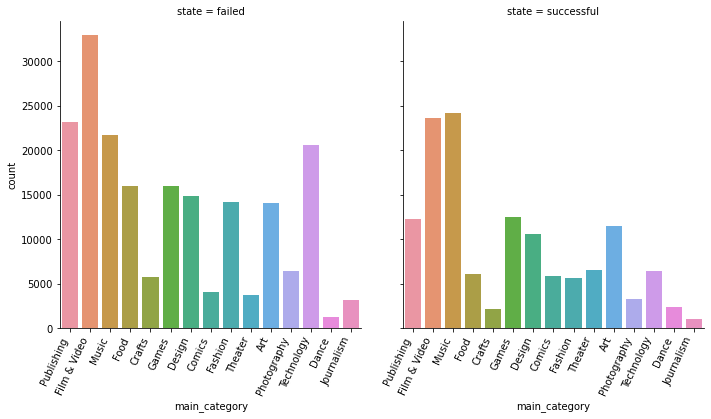

In [39]:
g = sns.catplot(x='main_category', col='state',data=ks_clean,kind='count')
g.set_xticklabels(rotation=65, horizontalalignment='right')

**There are a couple things that stand out to me right away. Number one is the categories which succeed more than they fail, which are Music, Comics, Theater, and Dance. Of the 15 main categories Kickstarter has, these 4 are the only ones that have a higher success rate than fail rate. Music is one the biggest categories of the list, comics are in the mid range, while theater and dance are in the lower range of categories.**

**There are also the categories which fail significantly more than they succeed, which are Publishing, Film and Video, Fashion and Technology. In the case of punlishing and F&V, Both of them rank highly as the highest numbers of types of Kickstarters, so it's not too surprisng to see big numbers of both success and failure. Fashion and Technology I find particualry interesting because the difference between the successes and failures is so significant, espescially for technology. I suspect this might have to do with the cost of the average technology Kickstarter.**

**Now I want to look at the number of backers per category.**

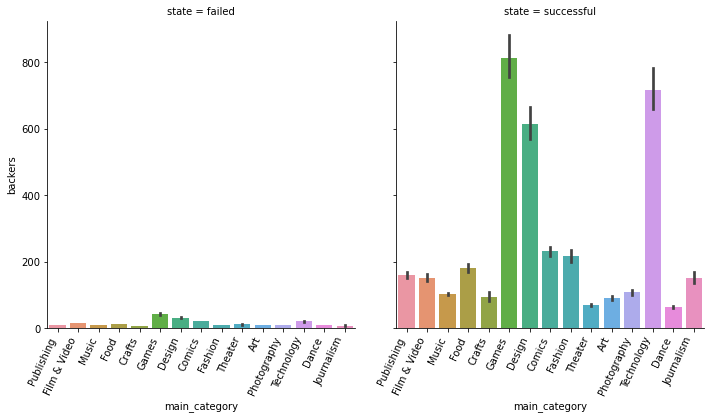

In [40]:
g = sns.catplot(x='main_category',y='backers',col='state',data=ks_clean,kind='bar')
g.set_xticklabels(rotation=65, horizontalalignment='right')

**The three highest categories for backers are Games, Technology, and Design, with all other categories being significantly behind. This makes sense, video game and technology kickstarters often have high goals, and so would need more people to make the goals met. additionally, it makes sense that film and video are not as high, as they are probably less finance intesive projects to create. This suggests that games and technology projects are big gambles, as the barrier to cross for reasonable success are much higher than other projects.**

**Next I want to look at the comparisons between caegories and which kickstarters see more money pledged.**

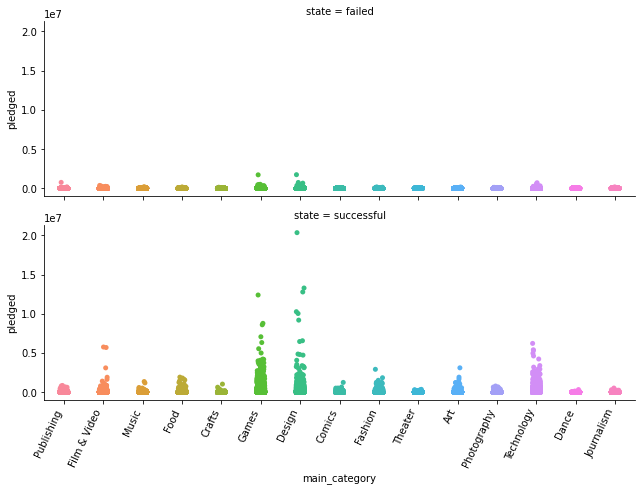

In [41]:
g = sns.catplot(x='main_category',y='pledged',row='state',data=ks_clean, aspect=3, height=3)
g.set_xticklabels(rotation=65, horizontalalignment='right')

**What's interesting here is how the three most funded categories (games, deisgn and technology) are also the categories which see the most significant outliers, particularly design. It seems as though the kinds of people who would donate to these kinds of kickstarters are also the most likely to give significant amounts of money. It's also interesting how siginificant the outliers are for F&V, considering how much more packed together other categories in its similar funding group are.**

**Finally, I want to look at is the dates of Kickstarters launched.** 

In [42]:
ks_clean = ks_clean.sort_values(by='ym-date')

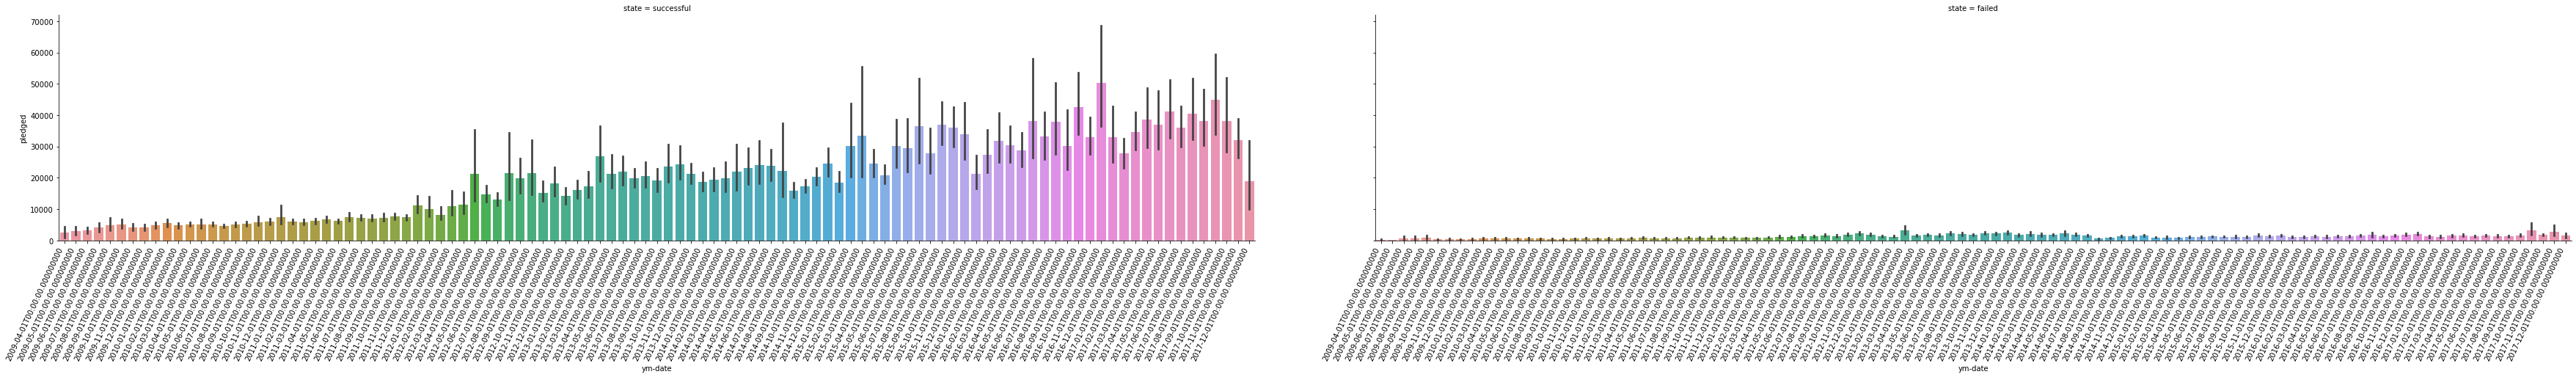

In [43]:
g = sns.catplot(x='ym-date',y='pledged',col='state',data=ks_clean,kind='bar',aspect=5,height=5,)
g.set_xticklabels(rotation=65, horizontalalignment='right')

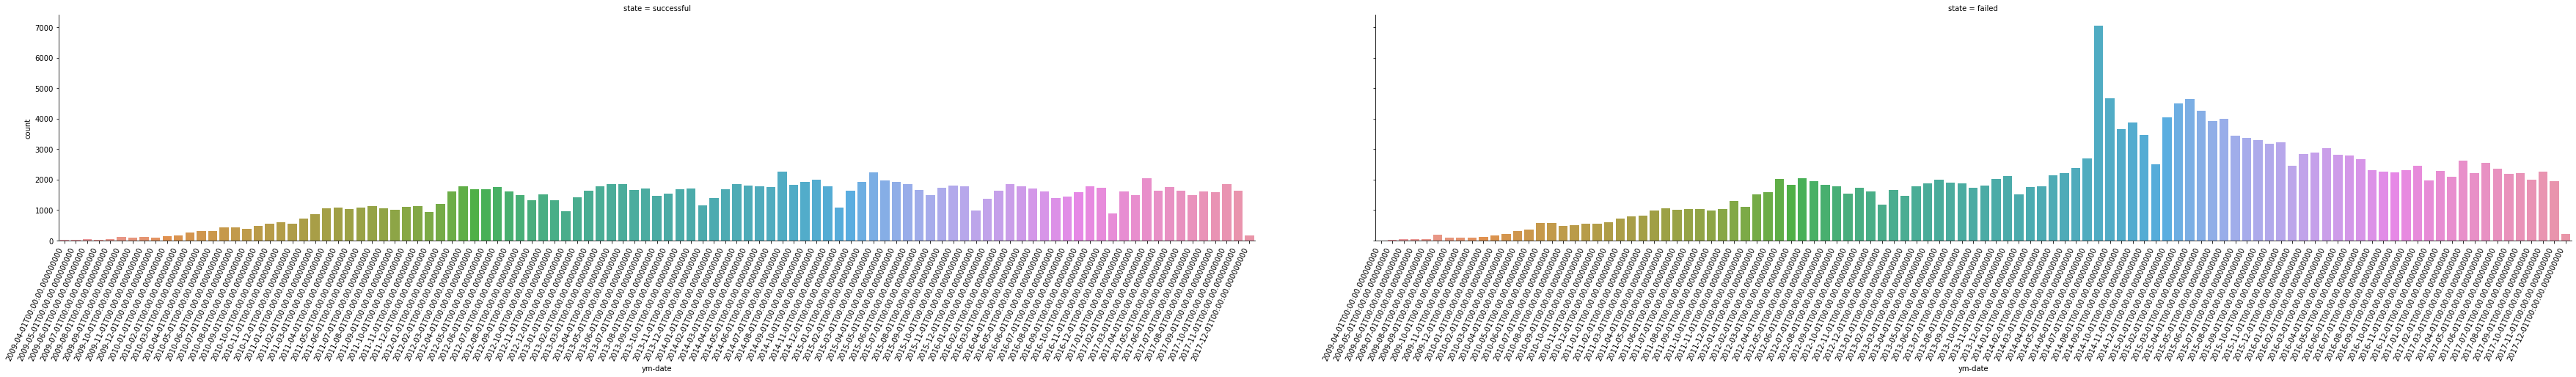

In [44]:
g = sns.catplot(x='ym-date',col='state',data=ks_clean,kind='count',aspect=5,height=5,)
g.set_xticklabels(rotation=65, horizontalalignment='right')

**For the most part, the trends of successes and failures over time are pretty straightforward: more people make kickstarters, more money is donated. What is interesting, is that under successful kickstarters, there is always a dip in december of that year, which might be tied to people's holiday spending, suggesting that would not be a good time to start a kickstarter.**

The primary take-aways from the EDA:
   - Kickstarters fail more often then they succeed
   - Music, Comics, Theater, and Dance are the categories which succeed more often then they fail. On the other hand,  Publishing, Film and Video, Fashion and Technology are significantly more likely to fail than succeed.
   - Games, Technology, and Design are the categories which generally get the most backers, and also recieve the most funding
   - games, deisgn and F&V have the most significant positive outliers in their funding.
   - with more kickstarters over time means more money spend on kickstarters over time.
   - holidays tend to see a dip in kickstarters.